In [105]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [106]:
df = pd.read_csv('churn-bigml-80.csv')

In [107]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [108]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

<AxesSubplot:>

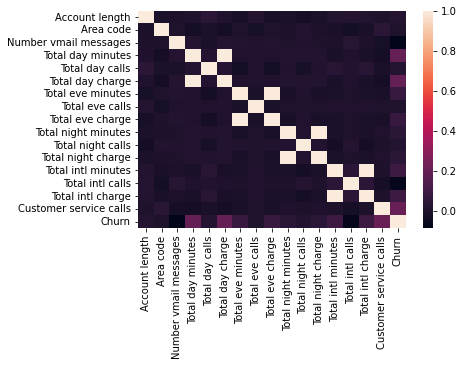

In [109]:
sns.heatmap(df.corr())

In [110]:
df = df.drop(['Total day minutes','Total eve minutes','Total night minutes','Total intl minutes'],axis = 1)

In [111]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day calls',
       'Total day charge', 'Total eve calls', 'Total eve charge',
       'Total night calls', 'Total night charge', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')

In [112]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False
1,OH,107,415,No,Yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False
2,NJ,137,415,No,No,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False
3,OH,84,408,Yes,No,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False
4,OK,75,415,Yes,No,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False


In [113]:
# ДЕРЕВО РЕШЕНИЙ

from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [114]:
# Категориальные поля переписываем в цифры. Churn(boolen значения не нужно переписывать в цифры)

df['International plan'] = df['International plan'].map({'No':0,'Yes':1})
df['Voice mail plan']=df['Voice mail plan'].map({'No':0,'Yes':1})

In [115]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False
1,OH,107,415,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False
2,NJ,137,415,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False
3,OH,84,408,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False
4,OK,75,415,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False


In [116]:
#Удаляем В X ненужные(невлияющие) на нашу зависимую переменную Churn столбцы и саму зависимую переменную Churn, это наш Y)

X = df.drop(['State','Account length', 'Area code' , 'Churn'],axis = 1)
Y = df['Churn']

In [117]:
# Fit function adjusts weights according to data values so that better accuracy can be achieved.
#Функция Fit регулирует веса в соответствии со значениями данных, чтобы можно было достичь большей точности.
clf.fit(X,Y)

DecisionTreeClassifier()

In [118]:

clf.score(X,Y)

1.0

In [119]:
# проделываем те же действия,что и выше для тестовых данных
test_df = pd.read_csv('churn-bigml-20.csv')

In [120]:
test_df = test_df.drop(['Total day minutes','Total eve minutes','Total night minutes','Total intl minutes'],axis = 1)

In [121]:
test_df['International plan'] = test_df['International plan'].map({'No':0,'Yes':1})
test_df['Voice mail plan'] = test_df['Voice mail plan'].map({'No':0,'Yes':1})

In [122]:
test_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35,1,False
1,IN,65,415,0,0,0,137,21.95,83,19.42,111,9.40,6,3.43,4,True
2,NY,161,415,0,0,0,67,56.59,97,27.01,128,7.23,9,1.46,4,True
3,SC,111,415,0,0,0,103,18.77,102,11.67,105,8.53,6,2.08,2,False
4,HI,49,510,0,0,0,117,20.28,109,18.28,90,8.04,1,3.00,1,False


In [123]:
X_test = test_df.drop(['State','Account length', 'Area code','Churn'], axis = 1)
Y_test = test_df['Churn']

In [124]:
X_test

,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls
0,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35,1
1,0,0,0,137,21.95,83,19.42,111,9.40,6,3.43,4
2,0,0,0,67,56.59,97,27.01,128,7.23,9,1.46,4
3,0,0,0,103,18.77,102,11.67,105,8.53,6,2.08,2
4,0,0,0,117,20.28,109,18.28,90,8.04,1,3.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
662,0,1,26,88,23.31,125,13.23,94,11.14,7,3.11,2
663,0,1,29,131,14.21,131,17.33,73,10.33,3,2.19,1
664,0,0,0,118,32.96,110,7.23,134,9.45,8,3.56,3
665,0,0,0,114,28.87,105,16.80,82,8.72,4,3.13,1


In [125]:
# оценим на тестовых метках и на тестовом множестве нашу функцию,которая оно не видела в процессе обучения.
clf.score(X_test,Y_test)

0.9115442278860569

In [ ]:
                                                      # Адаптивный бустинг

In [126]:
from sklearn.ensemble import AdaBoostClassifier

In [127]:
clf1 = AdaBoostClassifier()

In [128]:
clf1.fit(X,Y)

AdaBoostClassifier()

In [129]:
clf1.score(X_test,Y_test),clf1.score(X,Y)

(0.889055472263868, 0.8915978994748687)